In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import ast, json

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
data = pd.read_csv("Data/teaching_training_data.csv")
cft = pd.read_csv("Data/teaching_training_data_cft.csv", usecols=["unid", "cft_score"])
com = pd.read_csv("Data/teaching_training_data_com.csv", usecols=["unid", "com_score"])
grit = pd.read_csv("Data/teaching_training_data_grit.csv", usecols=["unid", "grit_score"])
num = pd.read_csv("Data/teaching_training_data_num.csv", usecols=["unid", "num_score"])
opt = pd.read_csv("Data/teaching_training_data_opt.csv", usecols=["unid", "opt_score"])
data.head()

,Unnamed: 0,unid,survey_date_month,survey_num,gender,dob,province,working,job_start_date,job_leave_date,...,leadershiprole,peoplelive,peoplelive_15plus,numchildren,numearnincome,anygrant,anyhhincome,financial_situation_now,financial_situation_5years,givemoney_yes
0,1,41964,2018-06-01,1,Female,1992-02-01,NaN,True,2018-06-01,NaN,...,NaN,NaN,NaN,NaN,NaN,False,False,NaN,NaN,NaN
1,2,41964,2018-11-01,2,Female,1992-02-01,NaN,True,2018-04-30,2018-11-08,...,NaN,NaN,NaN,NaN,NaN,False,False,NaN,NaN,NaN
2,3,15241,2016-03-01,1,Female,1988-11-01,NaN,True,2015-03-01,2016-03-15,...,No,2,NaN,3,1,True,True,2,8,False
3,4,33702,2016-04-01,1,Male,1991-04-01,NaN,True,2016-02-01,2016-04-14,...,No,4,NaN,1,1,False,True,1 (Worst possible financial situation),1 (Worst possible financial situation),False
4,5,33702,2016-08-01,2,Male,1991-04-01,NaN,False,NaN,NaN,...,No,4,NaN,1,1,False,True,1 (Worst possible financial situation),1 (Worst possible financial situation),False


In [3]:
data.dtypes

Unnamed: 0                     int64
unid                           int64
survey_date_month             object
survey_num                     int64
gender                        object
dob                           object
province                      object
working                         bool
job_start_date                object
job_leave_date                object
company_size                  object
monthly_pay                   object
volunteer                     object
leadershiprole                object
peoplelive                    object
peoplelive_15plus             object
numchildren                   object
numearnincome                 object
anygrant                      object
anyhhincome                   object
financial_situation_now       object
financial_situation_5years    object
givemoney_yes                 object
dtype: object

In [4]:
data.apply('nunique')

Unnamed: 0                    83270
unid                          51262
survey_date_month                34
survey_num                        9
gender                            2
dob                             274
province                          9
working                           2
job_start_date                  160
job_leave_date                  851
company_size                      2
monthly_pay                      11
volunteer                         2
leadershiprole                    2
peoplelive                       21
peoplelive_15plus                17
numchildren                       6
numearnincome                    16
anygrant                          2
anyhhincome                       2
financial_situation_now          10
financial_situation_5years       10
givemoney_yes                     2
dtype: int64

In [5]:
columns_to_drop = ["job_start_date","job_leave_date","leadershiprole","peoplelive"
                   ,"peoplelive_15plus","numchildren","anygrant","anyhhincome"
                   ,"financial_situation_5years","financial_situation_now"
                   ,"givemoney_yes","province","dob"]
data = data.drop(columns_to_drop, axis=1)
data.head()
#i didnt think that those rows were relevant to our question but if we want to keep some then cool.

,Unnamed: 0,unid,survey_date_month,survey_num,gender,working,company_size,monthly_pay,volunteer,numearnincome
0,1,41964,2018-06-01,1,Female,True,More than 200 employees,Between R2001 and 3000,NaN,NaN
1,2,41964,2018-11-01,2,Female,True,NaN,NaN,NaN,NaN
2,3,15241,2016-03-01,1,Female,True,NaN,NaN,No,1
3,4,33702,2016-04-01,1,Male,True,NaN,NaN,Yes,1
4,5,33702,2016-08-01,2,Male,False,NaN,NaN,Yes,1


In [6]:
data.head()


,Unnamed: 0,unid,survey_date_month,survey_num,gender,working,company_size,monthly_pay,volunteer,numearnincome
0,1,41964,2018-06-01,1,Female,True,More than 200 employees,Between R2001 and 3000,NaN,NaN
1,2,41964,2018-11-01,2,Female,True,NaN,NaN,NaN,NaN
2,3,15241,2016-03-01,1,Female,True,NaN,NaN,No,1
3,4,33702,2016-04-01,1,Male,True,NaN,NaN,Yes,1
4,5,33702,2016-08-01,2,Male,False,NaN,NaN,Yes,1


In [7]:
columns_2_drop = ["Unnamed: 0","company_size","monthly_pay","volunteer","numearnincome"]
data = data.drop(columns_2_drop, axis=1)
data.head()

,unid,survey_date_month,survey_num,gender,working
0,41964,2018-06-01,1,Female,True
1,41964,2018-11-01,2,Female,True
2,15241,2016-03-01,1,Female,True
3,33702,2016-04-01,1,Male,True
4,33702,2016-08-01,2,Male,False


In [8]:
data.shape

(83270, 5)

In [9]:
#seyed: rajul and I got to this code, with Martha's help, that removes duplicates and keep the max
#to.frame() converts the gourpby results to a table format
cft_max = cft.groupby('unid')['cft_score'].max().to_frame()
cft_max

,cft_score
unid,
130,4
147,6
156,3
157,7
158,4
...,...
102486,6
102503,6
102504,3


In [10]:
#repeated for the rest
grit_max = grit.groupby('unid')['grit_score'].max().to_frame()
num_max = num.groupby('unid')['num_score'].max().to_frame()
com_max = com.groupby('unid')['com_score'].max().to_frame()
opt_max = opt.groupby('unid')['opt_score'].max().to_frame()


In [11]:
df = pd.merge(data,cft_max, how = 'outer', on = 'unid')
df = pd.merge(df,num_max, how = 'outer', on = 'unid')
df = pd.merge(df,com_max, how = 'outer', on = 'unid')
df = pd.merge(df,grit_max, how = 'outer', on = 'unid')
df = pd.merge(df,opt_max, how = 'outer', on = 'unid')
df
#this way by doing 'outer' i have not dropped any rows but created multiple copies, later i get rid of the unneccesary ones.

,unid,survey_date_month,survey_num,gender,working,cft_score,num_score,com_score,grit_score,opt_score
0,41964,2018-06-01,1,Female,True,4.0,NaN,4.0,9,NaN
1,41964,2018-11-01,2,Female,True,4.0,NaN,4.0,9,NaN
2,15241,2016-03-01,1,Female,True,4.0,NaN,5.0,3,7.0
3,33702,2016-04-01,1,Male,True,5.0,NaN,5.0,2,3.0
4,33702,2016-08-01,2,Male,False,5.0,NaN,5.0,2,3.0
...,...,...,...,...,...,...,...,...,...,...
83265,34341,2017-09-01,1,Male,False,NaN,NaN,NaN,8,3.0
83266,94118,2017-10-01,1,Male,False,NaN,NaN,NaN,3,4.0
83267,79971,2016-08-01,1,Female,False,8.0,5.0,6.0,7,3.0
83268,79971,2017-04-01,2,Female,True,8.0,5.0,6.0,7,3.0


In [12]:
#to save our new table in a seperate csv file
df.to_csv("merged.csv", index=False)

In [13]:
df.shape

(83270, 10)

In [14]:
print(df.isnull().sum())

unid                     0
survey_date_month        0
survey_num               0
gender                  24
working                  0
cft_score            24419
num_score            61771
com_score            46621
grit_score               0
opt_score            27571
dtype: int64


In [15]:
df_new = df.sort_values(by="survey_date_month").drop_duplicates(subset=["unid"], keep="last")
df_new

,unid,survey_date_month,survey_num,gender,working,cft_score,num_score,com_score,grit_score,opt_score
33020,29920,2016-02-01,1,Female,False,7.0,4.0,6.0,3,4.0
14749,46466,2016-02-01,1,Male,False,3.0,NaN,NaN,7,6.0
2464,93971,2016-02-01,1,Female,False,5.0,NaN,7.0,0,2.0
71145,91343,2016-02-01,1,Male,False,6.0,NaN,NaN,9,4.0
56307,31397,2016-02-01,1,Male,True,6.0,3.0,6.0,7,NaN
...,...,...,...,...,...,...,...,...,...,...
41858,75695,2018-11-01,2,Male,True,10.0,8.0,7.0,6,NaN
15711,18142,2018-11-01,3,Male,False,2.0,NaN,NaN,4,NaN
472,3705,2018-11-01,3,Female,False,NaN,NaN,NaN,9,2.0
45275,98327,2018-11-01,2,Male,False,NaN,NaN,NaN,9,NaN


In [16]:
print(df_new.shape)

# Rows containing duplicate data
duplicate_rows_df = df_new[df_new.duplicated()]

print(duplicate_rows_df.shape)



(51262, 10)
(0, 10)


In [ ]:
cft 
opt
grit

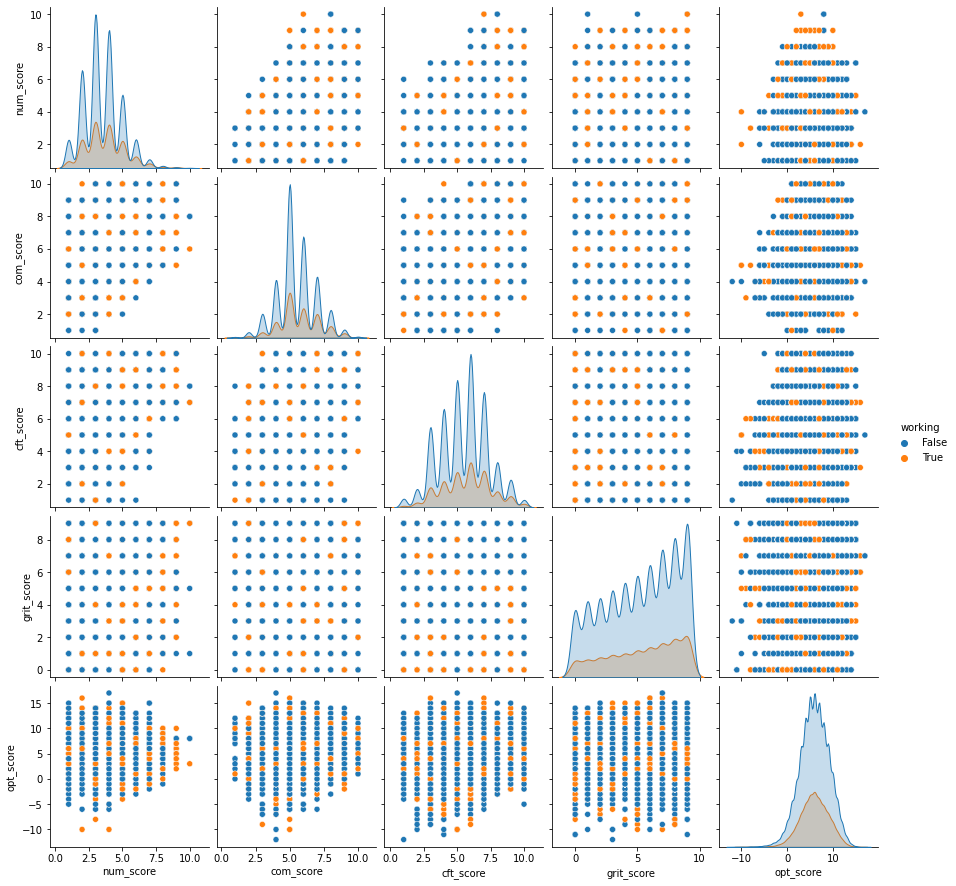

In [28]:
sns.pairplot(df_new, hue ='working')

In [ ]:
sns.set(style="ticks", palette="muted")
sns.relplot(x="total_bill", y="tip", col="time",
            hue="smoker", style="smoker", size="size",
            data=tips);

In [17]:
df.aggregate?

In [18]:
df_new = df.groupby(df['unid']).aggregate({'gender': 'first','working':'last'
                                           ,'num_score': 'max','com_score': 'max'
                                           ,'cft_score': 'max','grit_score': 'max'
                                           ,'opt_score': 'mean'})
#the idea here being that i have kept all the participants and decided that for the opt score i would take the mean. 
#may nit have been the best way to do it but i think this leaves all the relevant information without data mining.
# I took the mean of the opt scores because they go into negatives and here were no obvious outliers. 

In [19]:
df_new.head(30)

,gender,working,num_score,com_score,cft_score,grit_score,opt_score
unid,,,,,,,
2,Female,False,NaN,NaN,NaN,6,NaN
3,Male,True,NaN,NaN,NaN,0,NaN
6,Female,False,NaN,NaN,NaN,7,NaN
7,Female,False,NaN,NaN,NaN,7,NaN
14,Female,True,NaN,NaN,NaN,7,3.0
17,Female,True,NaN,NaN,NaN,3,NaN
18,Male,False,NaN,NaN,NaN,0,NaN
25,Female,False,NaN,NaN,NaN,1,NaN
26,Female,False,NaN,NaN,NaN,6,NaN


In [20]:
df_new.shape #so we still have all the participants included as the total of unique participants in 51,262. 


(51262, 7)

In [21]:
df.apply('nunique')

unid                 51262
survey_date_month       34
survey_num               9
gender                   2
working                  2
cft_score               10
num_score               10
com_score               10
grit_score              10
opt_score               30
dtype: int64

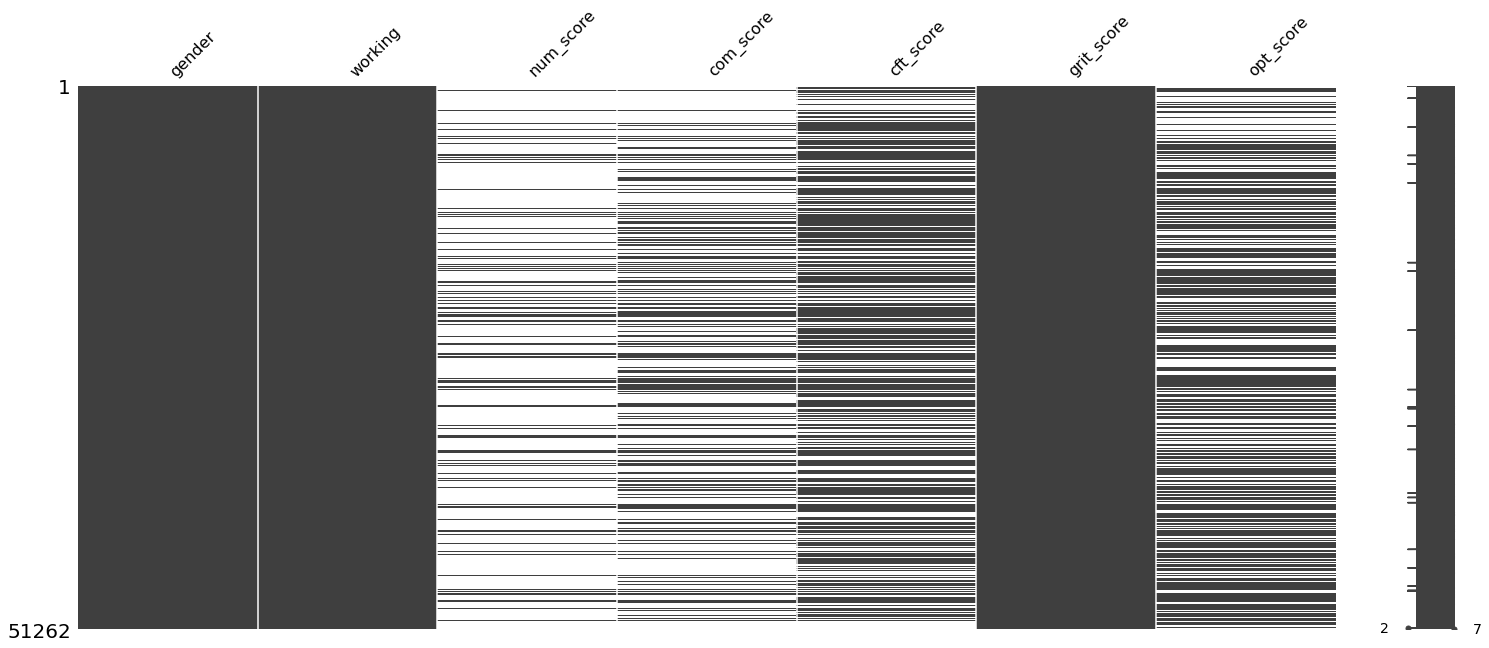

In [22]:
import missingno as msno
msno.matrix(df_new); #so as we can see, grit is the only thing that everyone seems to have done.

In [23]:
from ipywidgets import interact, fixed

In [24]:
def numerical_variable_distribution(df_new, col):
    df_new[col].plot.hist()

In [25]:
numerical_columns = df_new.select_dtypes(include=[np.number]).columns.tolist()
interact(numerical_variable_distribution, 
         col=numerical_columns, df_new=fixed(df_new));

interactive(children=(Dropdown(description='col', options=('num_score', 'com_score', 'cft_score', 'grit_score'…

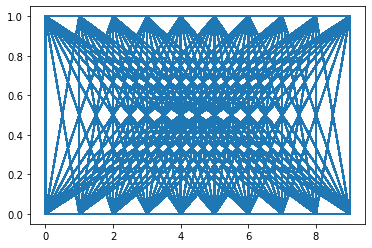

In [26]:
plt.plot('grit_score','working', data=df_new)
plt.show()
#obviously this shows us nothing....but it looks awesome. so i'm gonna leave it here 